In [11]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [10]:
# Load the output datasets
sklearn_models_output = pd.read_csv('/content/drive/MyDrive/Analysis/Credit Risk Analysis/data/sklearn_based_models_prediction_output.csv')
boosting_models_output = pd.read_csv('/content/drive/MyDrive/Analysis/Credit Risk Analysis/data/xgboost_and_catboost_prediction_output.csv')

# To make sure if 'y_actual' values in both dataframes are identic to eachother
assert sklearn_models_output['y_actual'].equals(boosting_models_output['y_actual']), "Mismatch in y_actual columns!"

# Drop 'y_actual' from boosting_models_output to avoid duplications
boosting_models_output = boosting_models_output.drop(columns=['y_actual'])

# Merge dataframes horizontally
combined_output = pd.concat([sklearn_models_output, boosting_models_output], axis=1)

# Show the merged dataframe
combined_output.head()


,y_actual,y_logreg_imbal,y_logreg_under,y_logreg_over,y_ranfor_imbal,y_ranfor_under,y_ranfor_over,y_svm_imbal,y_svm_under,y_svm_over,y_xgb_imbal,y_xgb_under,y_xgb_over,y_cat_imbal,y_cat_under,y_cat_over
0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,1,0,1,1,0,1,1,0,1,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Daftar nama kolom model prediksi (selain y_actual)
model_columns = [col for col in combined_output.columns if col != 'y_actual']

# Buat dictionary untuk menyimpan hasil evaluasi
evaluation_results = []

for col in model_columns:
    y_true = combined_output['y_actual']
    y_pred = combined_output[col]

    # Hitung metrik
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    try:
        auc = roc_auc_score(y_true, y_pred)
    except ValueError:
        auc = None  # kalau hanya satu kelas yang diprediksi

    evaluation_results.append({
        'Model': col,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'ROC AUC': auc
    })

# Konversi ke DataFrame untuk dilihat
import pandas as pd
eval_df = pd.DataFrame(evaluation_results)

# Urutkan berdasarkan F1 Score atau ROC AUC
eval_df_sorted = eval_df.sort_values(by='F1 Score', ascending=False)

print(eval_df_sorted)

             Model  Accuracy  Precision  Recall  F1 Score   ROC AUC
10     y_xgb_under  0.934519   0.869953  0.8295  0.849245  0.897023
11      y_xgb_over  0.933852   0.867224  0.8295  0.847943  0.896594
13     y_cat_under  0.931073   0.864693  0.8180  0.840699  0.890701
14      y_cat_over  0.930295   0.867702  0.8100  0.837859  0.887345
3   y_ranfor_imbal  0.929628   0.889459  0.7805  0.831425  0.876383
5    y_ranfor_over  0.918621   0.809873  0.8285  0.819081  0.886444
6      y_svm_imbal  0.916620   0.856328  0.7510  0.800213  0.857487
8       y_svm_over  0.910839   0.799500  0.7995  0.799500  0.871087
12     y_cat_imbal  0.917176   0.910399  0.6960  0.788892  0.838207
4   y_ranfor_under  0.888716   0.685481  0.9230  0.786704  0.900957
9      y_xgb_imbal  0.913508   0.885732  0.7015  0.782924  0.837812
2    y_logreg_over  0.888716   0.719947  0.8175  0.765629  0.863289
0   y_logreg_imbal  0.897276   0.780501  0.7485  0.764165  0.844157
7      y_svm_under  0.865814   0.635556  0.9295 

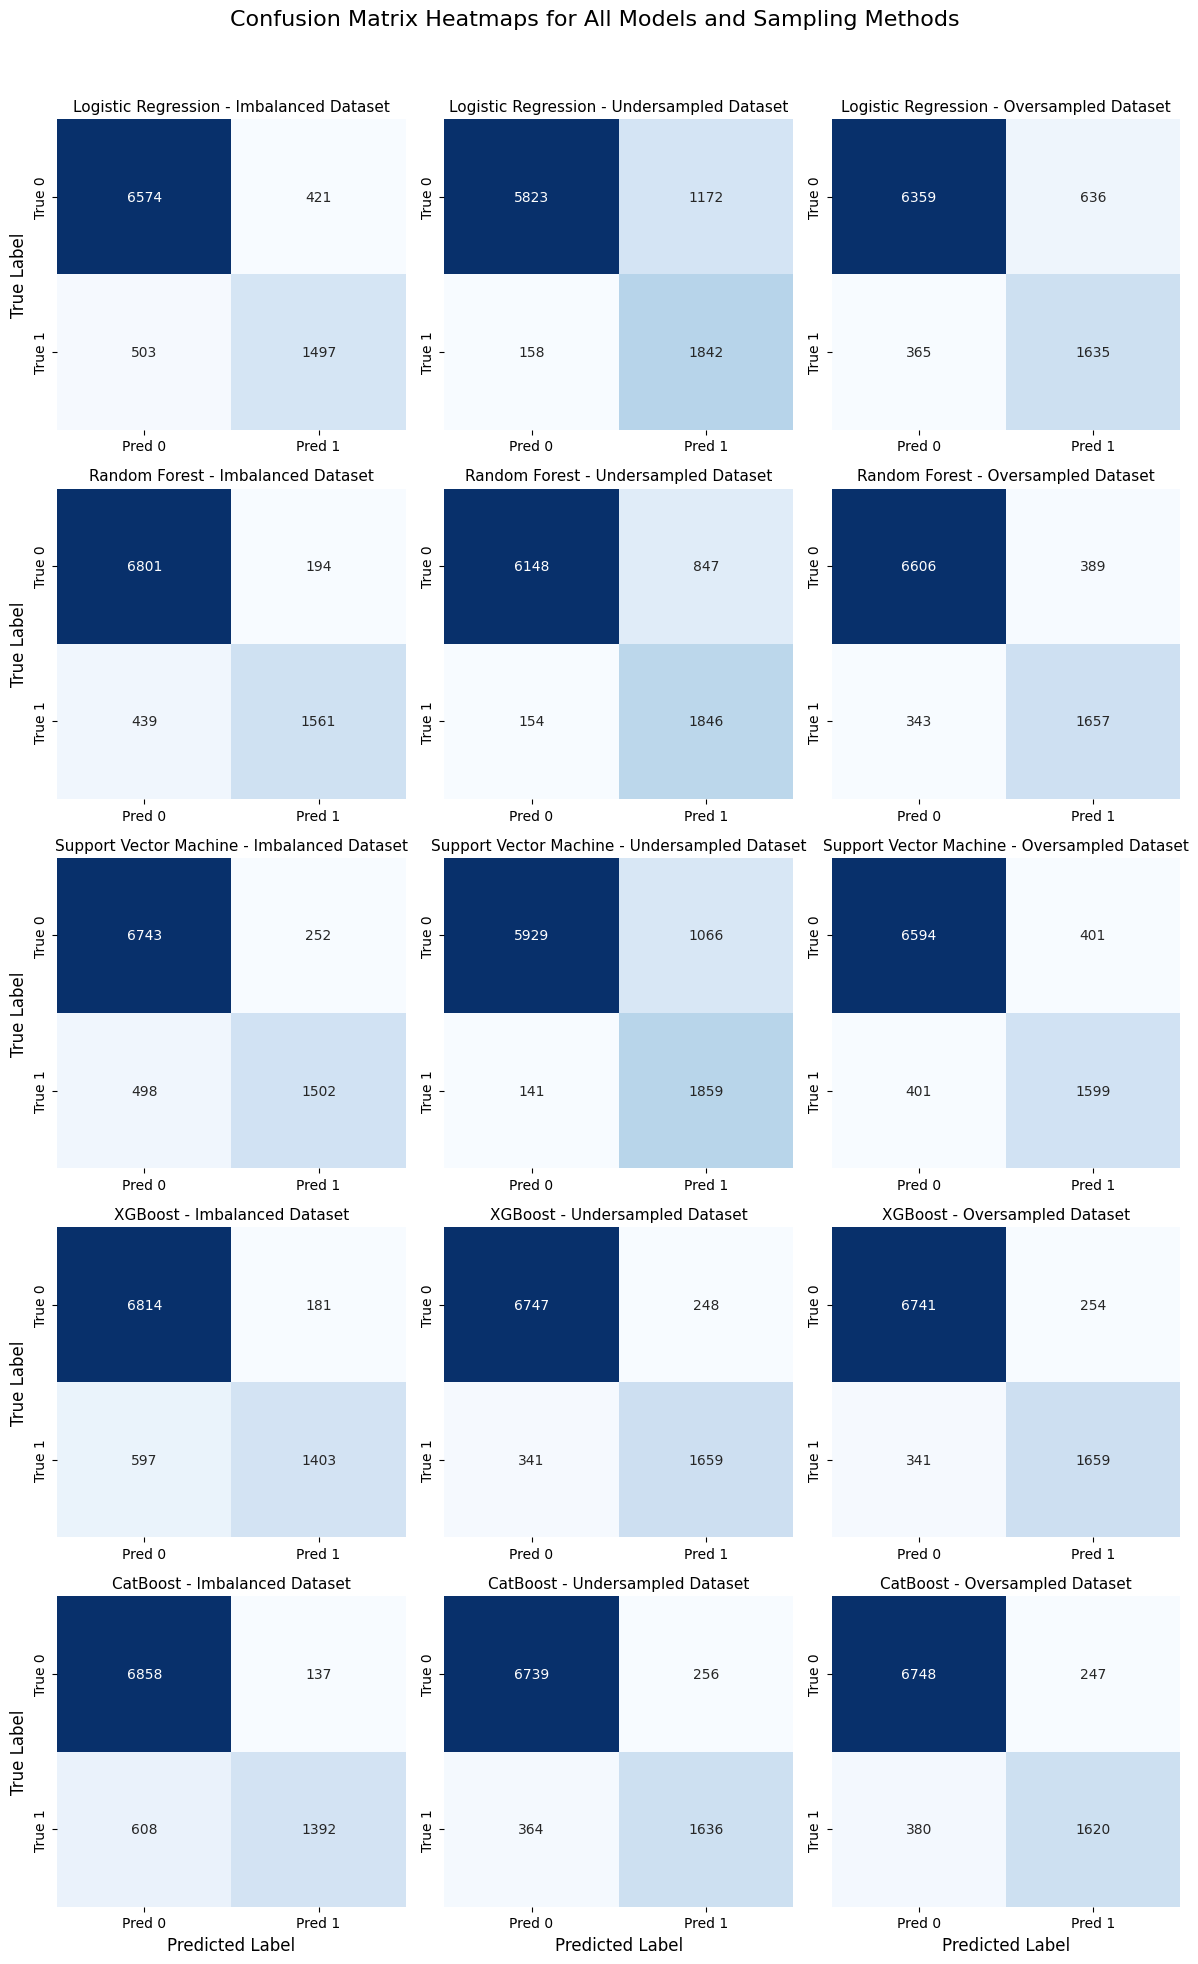

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

algorithms = ['logreg', 'ranfor', 'svm', 'xgb', 'cat']
samplings = ['imbal', 'under', 'over']

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(12, 20))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

for i, algo in enumerate(algorithms):
    for j, samp in enumerate(samplings):
        ax = axes[i, j]

        col_name = f'y_{algo}_{samp}'
        y_pred = combined_output[col_name]
        y_true = combined_output['y_actual']

        cm = confusion_matrix(y_true, y_pred)

        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                    ax=ax, xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])

        ax.set_title(f'{algo_fullname[algo]} - {x_labels[j]}', fontsize=11)
        ax.set_xlabel('')
        ax.set_ylabel('')

# Atur label sumbu y di kolom pertama dan label sumbu x di baris terakhir
for ax in axes[:, 0]:
    ax.set_ylabel('True Label', fontsize=12)
for ax in axes[-1, :]:
    ax.set_xlabel('Predicted Label', fontsize=12)

plt.suptitle('Confusion Matrix Heatmaps for All Models and Sampling Methods', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

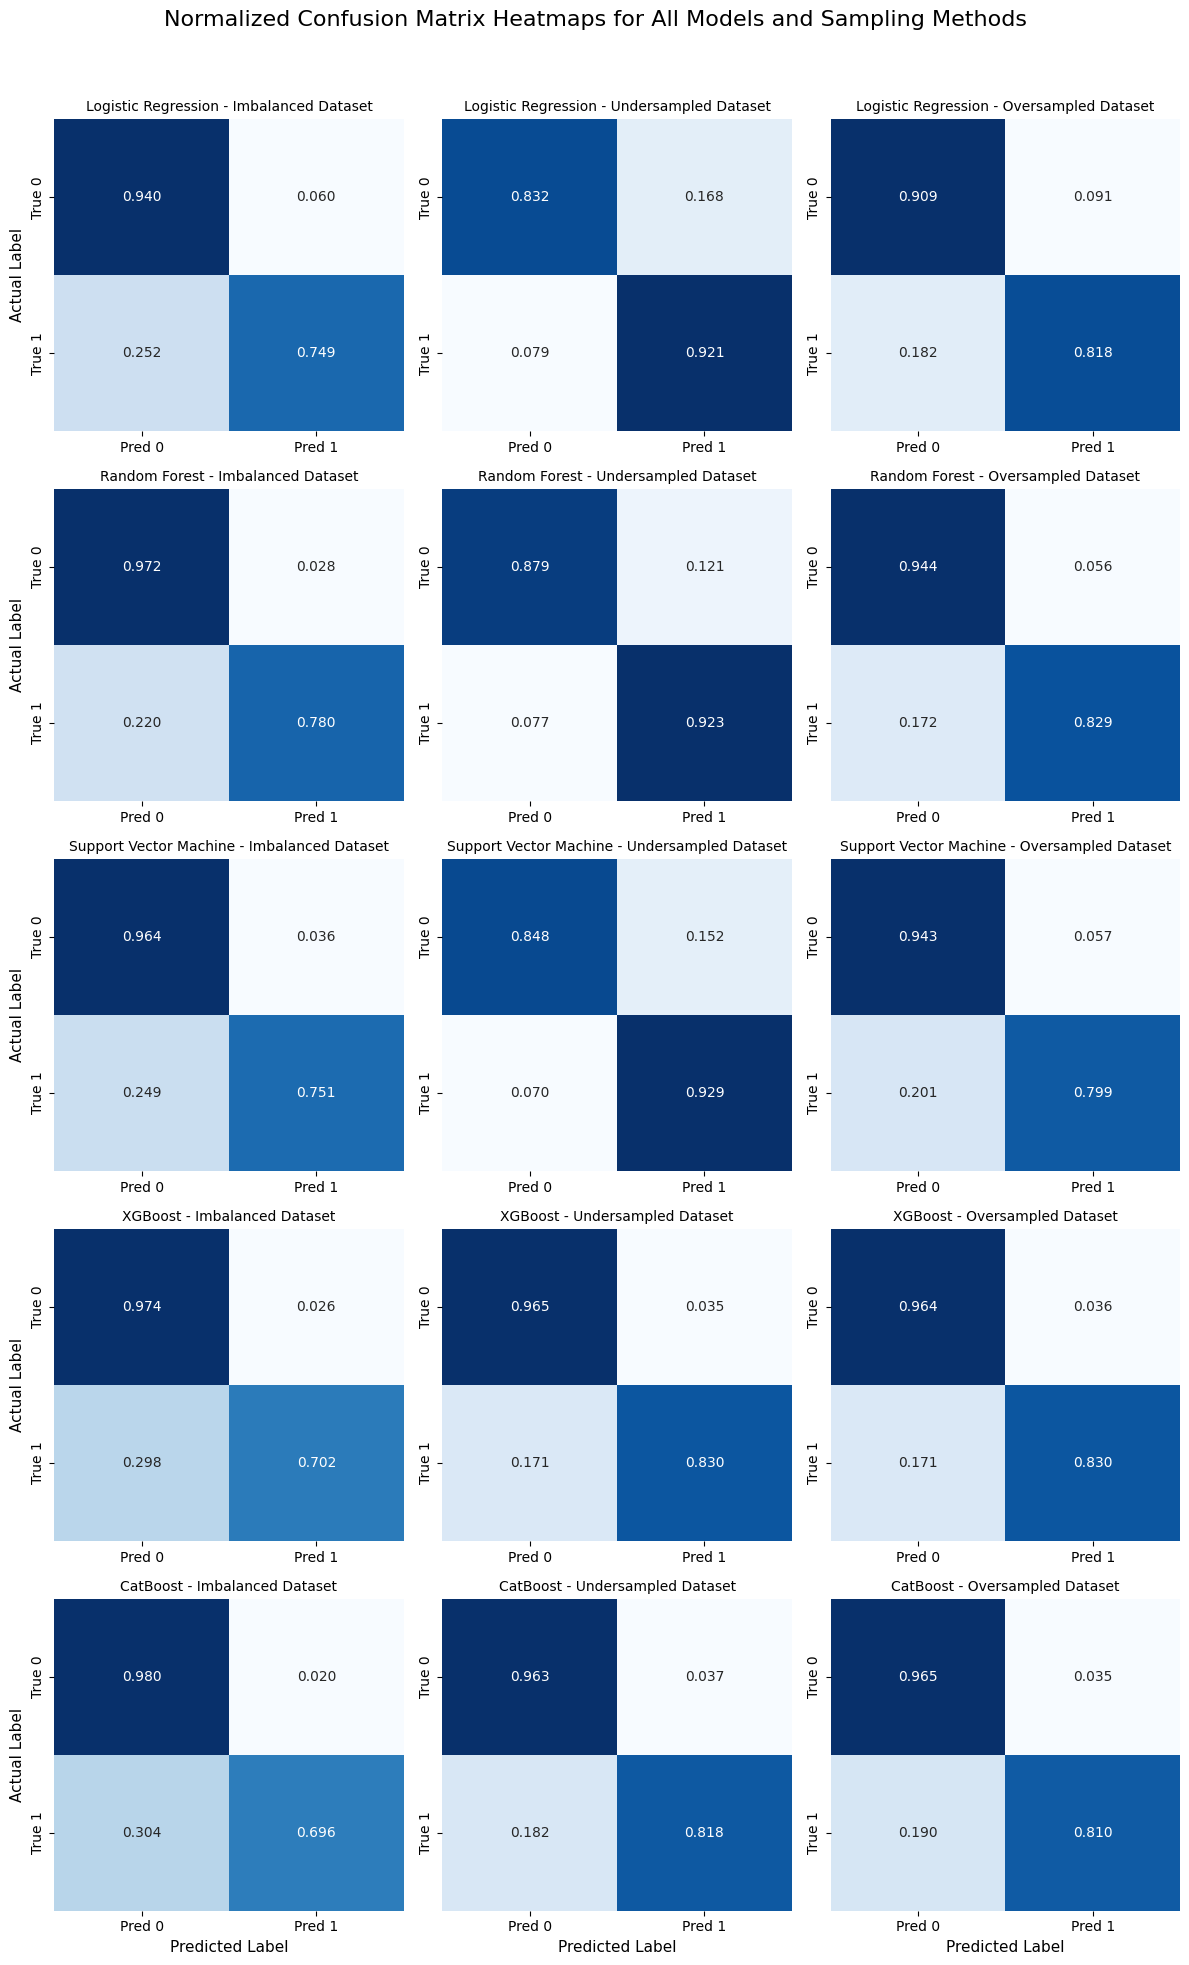

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Mapping nama panjang algoritma
algo_fullname = {
    'logreg': 'Logistic Regression',
    'ranfor': 'Random Forest',
    'svm': 'Support Vector Machine',
    'xgb': 'XGBoost',
    'cat': 'CatBoost'
}

algorithms = ['logreg', 'ranfor', 'svm', 'xgb', 'cat']
samplings = ['imbal', 'under', 'over']
x_labels = ['Imbalanced Dataset', 'Undersampled Dataset', 'Oversampled Dataset']

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(12, 20))
plt.subplots_adjust(hspace=0.6, wspace=0.4)

for i, algo in enumerate(algorithms):
    for j, samp in enumerate(samplings):
        ax = axes[i, j]

        col_name = f'y_{algo}_{samp}'
        y_pred = combined_output[col_name]
        y_true = combined_output['y_actual']

        # Hitung confusion matrix normalized (per row = per class actual)
        cm = confusion_matrix(y_true, y_pred, normalize='true')

        # Plot heatmap
        sns.heatmap(cm, annot=True, fmt=".3f", cmap='Blues', cbar=False,
                    xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'], ax=ax)

        # Set judul heatmap
        ax.set_title(f'{algo_fullname[algo]} - {x_labels[j]}', fontsize=10)
        ax.set_xlabel('')
        ax.set_ylabel('')

# Label sumbu X dan Y hanya di kolom dan baris tertentu agar tidak duplikatif
for ax in axes[-1, :]:  # baris terakhir
    ax.set_xlabel('Predicted Label', fontsize=11)
for ax in axes[:, 0]:  # kolom pertama
    ax.set_ylabel('Actual Label', fontsize=11)

plt.suptitle('Normalized Confusion Matrix Heatmaps for All Models and Sampling Methods', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

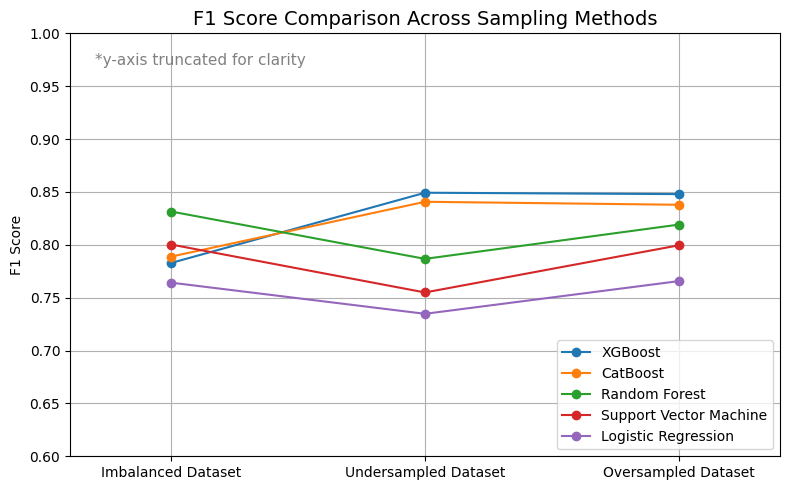

In [84]:
# Mapping nama panjang algoritma
algo_fullname = {
    'logreg': 'Logistic Regression',
    'ranfor': 'Random Forest',
    'svm': 'Support Vector Machine',
    'xgb': 'XGBoost',
    'cat': 'CatBoost'
}

# Urutan dan label sumbu x
sampling_order = ['imbal', 'under', 'over']
x_labels = ['Imbalanced Dataset', 'Undersampled Dataset', 'Oversampled Dataset']
x_pos = np.arange(len(sampling_order))  # [0, 1, 2]

plt.figure(figsize=(8, 5))

# Plot per algoritma
for algo in eval_df_sorted['Algorithm'].unique():
    df_algo = eval_df_sorted[eval_df_sorted['Algorithm'] == algo]
    df_algo = df_algo.set_index('Sampling').loc[sampling_order]
    plt.plot(x_pos, df_algo['F1 Score'], marker='o', label=algo_fullname[algo])

# Atur posisi ticks agar lebih ke tengah
plt.xticks(ticks=x_pos, labels=x_labels)
plt.xlim(-0.4, 2.4)  # tambahkan padding kiri-kanan agar tidak terlalu ke tepi
plt.ylim(0.6, 1)

plt.title("F1 Score Comparison Across Sampling Methods", fontsize=14)
plt.ylabel("F1 Score")
plt.legend(title='Algorithm')
plt.legend(loc='lower right')
plt.text(-0.3, 0.97, '*y-axis truncated for clarity', fontsize=11, color='grey')
plt.grid(True)
plt.tight_layout()
plt.show()

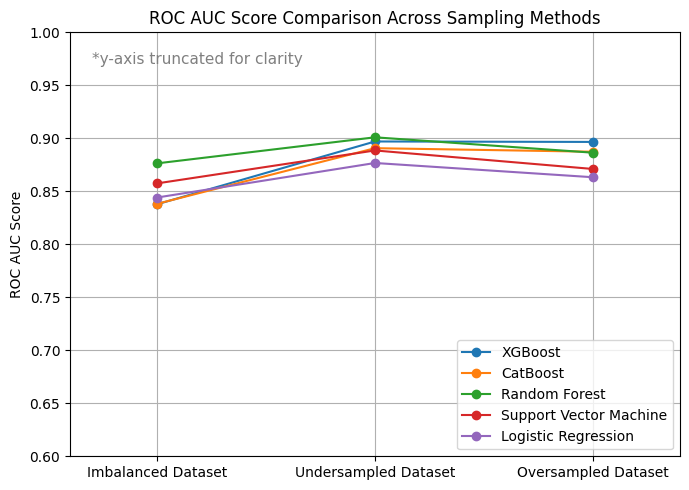

In [79]:


# Mapping nama panjang algoritma
algo_fullname = {
    'logreg': 'Logistic Regression',
    'ranfor': 'Random Forest',
    'svm': 'Support Vector Machine',
    'xgb': 'XGBoost',
    'cat': 'CatBoost'
}

# Urutan dan label sumbu x
sampling_order = ['imbal', 'under', 'over']
x_labels = ['Imbalanced Dataset', 'Undersampled Dataset', 'Oversampled Dataset']
x_pos = np.arange(len(sampling_order))  # [0, 1, 2]

plt.figure(figsize=(7, 5))

# Plot ROC AUC untuk setiap algoritma
for algo in eval_df_sorted['Algorithm'].unique():
    df_algo = eval_df_sorted[eval_df_sorted['Algorithm'] == algo]
    df_algo = df_algo.set_index('Sampling').loc[sampling_order]

    plt.plot(x_pos, df_algo['ROC AUC'], marker='o', label=algo_fullname[algo])

# Format sumbu x
plt.xticks(ticks=x_pos, labels=x_labels)
plt.xlim(-0.4, 2.4)  # tambahkan padding kiri-kanan agar tidak terlalu ke tepi
plt.ylim(0.6, 1)

# Judul dan label
plt.title("ROC AUC Score Comparison Across Sampling Methods")
plt.ylabel("ROC AUC Score")
plt.legend(title='Algorithm')
plt.legend(loc='lower right')
plt.text(-0.3, 0.97, '*y-axis truncated for clarity', fontsize=11, color='grey')
plt.grid(True)
plt.tight_layout()
plt.show()

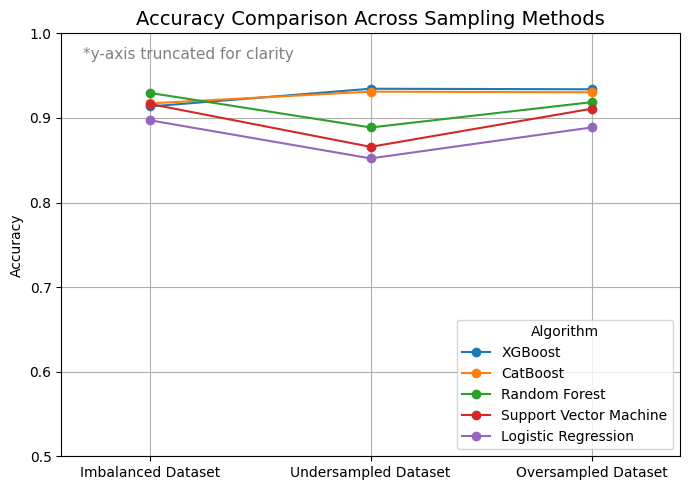

In [80]:
plt.figure(figsize=(7, 5))

# Plot per algoritma untuk Accuracy
for algo in eval_df_sorted['Algorithm'].unique():
    df_algo = eval_df_sorted[eval_df_sorted['Algorithm'] == algo]
    df_algo = df_algo.set_index('Sampling').loc[sampling_order]
    plt.plot(x_pos, df_algo['Accuracy'], marker='o', label=algo_fullname[algo])

# Atur ticks dan limits
plt.xticks(ticks=x_pos, labels=x_labels)
plt.xlim(-0.4, 2.4)
plt.ylim(0.5, 1)

plt.title("Accuracy Comparison Across Sampling Methods", fontsize=14)
plt.ylabel("Accuracy")
plt.legend(title='Algorithm', loc='lower right')
plt.text(-0.3, 0.97, '*y-axis truncated for clarity', fontsize=11, color='grey')
plt.grid(True)
plt.tight_layout()
plt.show()